# Prediction using Decision Tree Algorithm

## Importing the required libraries

 import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

## Loading the data  

In [70]:
df=pd.read_csv("iris.csv")

In [71]:
df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [72]:
#displaying the shape of the dataframe
df.shape

(150, 6)

In [73]:
#Displaying the first five rows 
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [74]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [75]:
#Converting the label in to an integer
label_encoder=preprocessing.LabelEncoder()
df["Species"]=label_encoder.fit_transform(df["Species"])

In [76]:
#Displaying the unique values
df["Species"].unique()

array([0, 1, 2])

In [77]:
#Displaying the null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [78]:
df=df.drop(['Id'],axis=1)

In [79]:

df.shape

(150, 5)

## Data Visualization 

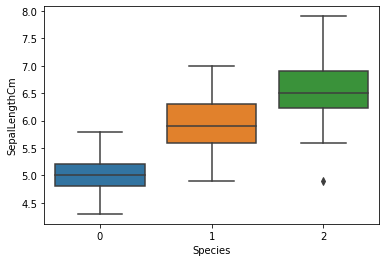

In [80]:
sns.boxplot(x="Species",y="SepalLengthCm",data=df)
plt.show()

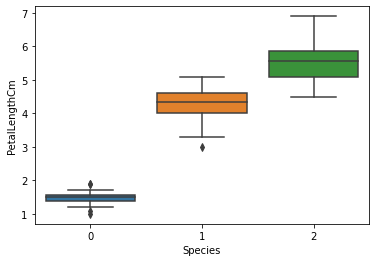

In [81]:
sns.boxplot(x="Species",y="PetalLengthCm",data=df)
plt.show()

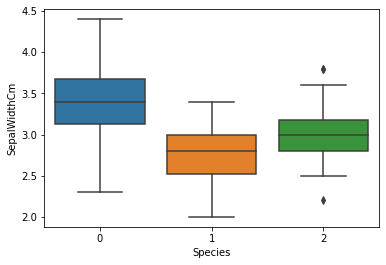

In [82]:
sns.boxplot(x="Species",y="SepalWidthCm",data=df)
plt.show()

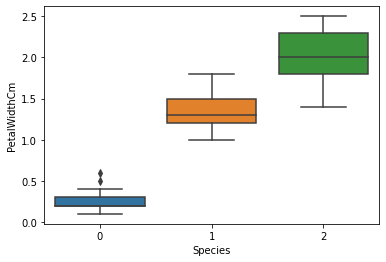

In [83]:
sns.boxplot(x="Species",y="PetalWidthCm",data=df)
plt.show()

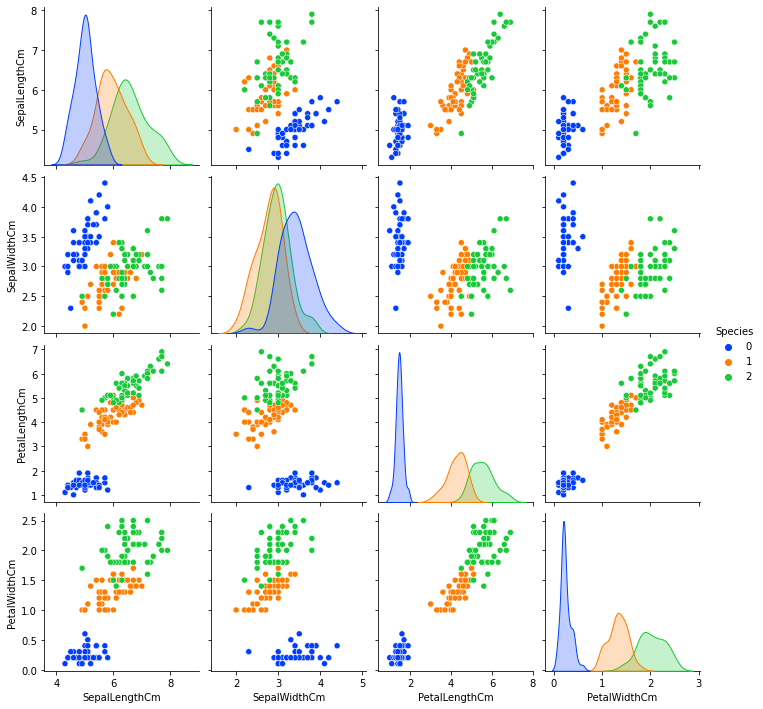

In [96]:
sns.pairplot(df,hue="Species",palette="bright")
plt.show()

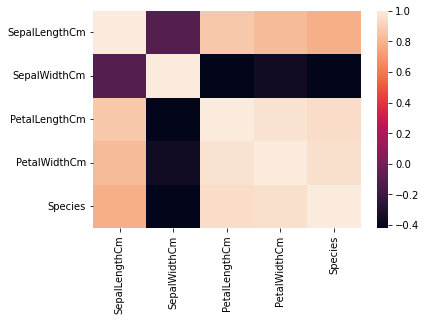

In [99]:
sns.heatmap(df.corr())
plt.show()

## Splitting the Dataset  

In [85]:
x=df.drop(["Species"],axis=1)
y=df["Species"]

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=1)

In [87]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(90, 4)
(60, 4)
(90,)
(60,)


## Decision tree classifier

In [88]:
clf = DecisionTreeClassifier(random_state = 0)

In [89]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [90]:
clf.predict(x_test)

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1, 2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1])

In [91]:
#Displaying the accuracy score 
clf.score(x_test, y_test)

0.9666666666666667

In [92]:
clf.score(x_train,y_train)

1.0

## Decision Tree Classifier Visualisation 

(0.0, 1.0, 0.0, 1.0)

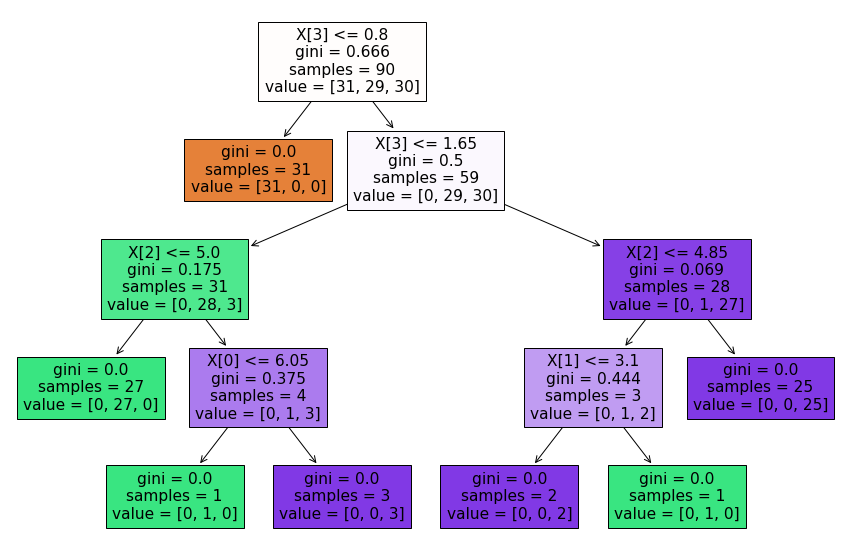

In [95]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.axis("off")

In [66]:
print(tree.export_text(clf))

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 5.00
|   |   |   |--- class: 1
|   |   |--- feature_2 >  5.00
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- class: 2
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2

